In [1]:
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
directory = 'gcm_data/dec_1_2021'
file_name = 'chl.0000000000.nc'
f_path = directory + '/' + file_name
DS = xr.open_dataset(f_path)
DS

<xarray.Dataset>
Dimensions:      (Zmd000023: 23, X: 360, Y: 160, T: 11)
Coordinates:
  * X            (X) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * Y            (Y) float64 -79.5 -78.5 -77.5 -76.5 ... 76.5 77.5 78.5 79.5
  * T            (T) datetime64[ns] 2000-01-31 2000-03-01 ... 2000-11-26
Dimensions without coordinates: Zmd000023
Data variables: (12/33)
    diag_levels  (Zmd000023) float64 ...
    iter         (T) int32 ...
    TRAC71       (T, Zmd000023, Y, X) float32 ...
    TRAC72       (T, Zmd000023, Y, X) float32 ...
    TRAC73       (T, Zmd000023, Y, X) float32 ...
    TRAC74       (T, Zmd000023, Y, X) float32 ...
    ...           ...
    TRAC96       (T, Zmd000023, Y, X) float32 ...
    TRAC97       (T, Zmd000023, Y, X) float32 ...
    TRAC98       (T, Zmd000023, Y, X) float32 ...
    TRAC99       (T, Zmd000023, Y, X) float32 ...
    TRAC0a       (T, Zmd000023, Y, X) float32 ...
    TRAC0b       (T, Zmd000023, Y, X) float32 ...
Attributes: (12/18)
    MITgcm_version:  checkpoint68d
    build_user:      birdy
    build_host:      eofe7.cm.cluster
    build_date:      Thu Nov 18 13:27:44 EST 2021
    MITgcm_URL:      http://mitgcm.org
    MITgcm_tag_id:   
    ...              ...
    nSy:             1
    nPx:             12
    nPy:             8
    Nx:              360
    Ny:              160
    Nr:              23

In [3]:
# TODO: when renamed, something goes wrong with indexing 
ds = DS.rename_dims({'Zmd000023':'depth', 'X':'lon', 'Y':'lat', 'T':'time'})
ds = ds.assign_coords(Z=ds.depth)
ds = ds.rename(X='lon', Y='lat', T='time', Z='depth')
ds

<xarray.Dataset>
Dimensions:      (depth: 23, lon: 360, lat: 160, time: 11)
Coordinates:
  * lon          (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * lat          (lat) float64 -79.5 -78.5 -77.5 -76.5 ... 76.5 77.5 78.5 79.5
  * time         (time) datetime64[ns] 2000-01-31 2000-03-01 ... 2000-11-26
  * depth        (depth) int64 0 1 2 3 4 5 6 7 8 ... 14 15 16 17 18 19 20 21 22
Data variables: (12/33)
    diag_levels  (depth) float64 1.0 2.0 3.0 4.0 5.0 ... 20.0 21.0 22.0 23.0
    iter         (time) int32 240 480 720 960 1200 1440 1680 1920 2160 2400 2640
    TRAC71       (time, depth, lat, lon) float32 ...
    TRAC72       (time, depth, lat, lon) float32 ...
    TRAC73       (time, depth, lat, lon) float32 ...
    TRAC74       (time, depth, lat, lon) float32 ...
    ...           ...
    TRAC96       (time, depth, lat, lon) float32 ...
    TRAC97       (time, depth, lat, lon) float32 ...
    TRAC98       (time, depth, lat, lon) float32 ...
    TRAC99       (time, depth, lat, lon) float32 ...
    TRAC0a       (time, depth, lat, lon) float32 ...
    TRAC0b       (time, depth, lat, lon) float32 ...
Attributes: (12/18)
    MITgcm_version:  checkpoint68d
    build_user:      birdy
    build_host:      eofe7.cm.cluster
    build_date:      Thu Nov 18 13:27:44 EST 2021
    MITgcm_URL:      http://mitgcm.org
    MITgcm_tag_id:   
    ...              ...
    nSy:             1
    nPx:             12
    nPy:             8
    Nx:              360
    Ny:              160
    Nr:              23

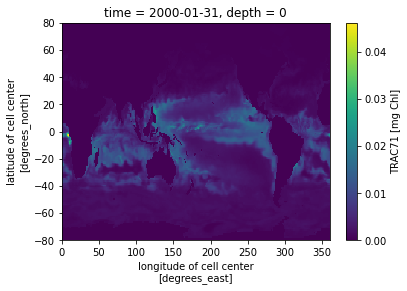

In [98]:
# selecting the surface at t0, plotting 
ds.isel(depth=0, time=0).TRAC71.plot()

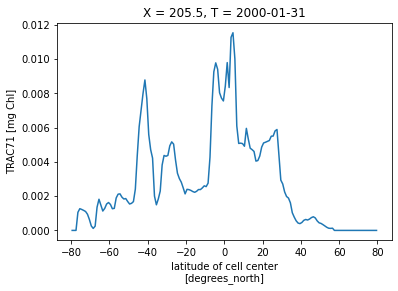

In [106]:
# Plot chlorophyll along the N/S transect at lon=205
trans_ds = DS.sel(X=205, method='nearest')
trans_ds.isel(Zmd000023=0, T=0).TRAC71.plot()